In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [98]:
df = pd.read_csv('depressiondata.csv')

In [99]:
df

Date  Distance covered(feet)  sleeping hours   Question1  Question2  \
0    1/1/2024                     950             9.00          1          0   
1    1/2/2024                    1000             7.00          1          0   
2    1/3/2024                     800             5.00          0          0   
3    1/4/2024                    1800             6.00          0          1   
4    1/5/2024                    2500             7.30          1          1   
5    1/6/2024                    1870             6.20          0          1   
6    1/7/2024                    3000             8.00          1          1   
7    1/8/2024                    4000             5.45          0          0   
8    1/9/2024                    3500             6.00          0          0   
9   1/10/2024                    2800             4.50          1          0   
10  1/11/2024                    1900             7.30          1          0   
11  1/12/2024                    1950             6.30          0          1   
12  1/13/2024                    1250             4.00          1          0   
13  1/14/2024                    2300             5.00          1          1   
14  1/15/2024                    5000             5.20          0          0   
15  1/16/2024                    3200             4.45          0          0   
16  1/17/2024                     700             5.75          0          0   
17  1/18/2024                    1200             4.00          1          1   
18  1/19/2024                    7000             8.10          1          0   
19  1/20/2024                    6300             6.00          1          1   
20  1/21/2024                    4700             5.00          1          0   
21  1/22/2024                    3400             7.40          0          0   
22  1/23/2024                     700             3.00          0          0   
23  1/24/2024                     300             5.00          0          0   
24  1/25/2024                     850             6.10          0          1   
25  1/26/2024                    2400             7.00          1          1   
26  1/27/2024                     200             4.25          0          0   
27  1/28/2024                     500             8.00          1          0   
28  1/29/2024                     600             5.40          1          1   
29  1/30/2024                    1400             4.40          0          0   

    Question3  Question4  Question5  depression_label  Unnamed: 9  
0           0          0          1                 0           0  
1           1          1          1                 0           0  
2           0          0          0                 1           1  
3           1          0          1                 0           0  
4           0          0          1                 0           0  
5           0          0          0                 0           0  
6           1          1          1                 0           0  
7           0          0          0                 1           0  
8           1          1          1                 0           0  
9           0          1          1                 0           0  
10          1          1          0                 0           0  
11          1          0          0                 0           0  
12          1          1          1                 0           0  
13          1          1          1                 0           0  
14          0          0          0                 1           0  
15          0          0          0                 1           0  
16          0          0          0                 1           1  
17          1          1          0                 0           0  
18          0          1          1                 0           0  
19          1          0          0                 0           0  
20          1          0          1                 0           0  
21          0          1        

In [100]:
df.rename(columns={"Unnamed: 9": "Depression_label"}, inplace=True)

In [101]:
df.groupby(["Depression_label"]).size()

Depression_label
0    24
1     6
dtype: int64

In [102]:
df['Date'] = pd.to_datetime(df['Date'])

In [103]:
df

Date  Distance covered(feet)  sleeping hours   Question1  Question2  \
0  2024-01-01                     950             9.00          1          0   
1  2024-01-02                    1000             7.00          1          0   
2  2024-01-03                     800             5.00          0          0   
3  2024-01-04                    1800             6.00          0          1   
4  2024-01-05                    2500             7.30          1          1   
5  2024-01-06                    1870             6.20          0          1   
6  2024-01-07                    3000             8.00          1          1   
7  2024-01-08                    4000             5.45          0          0   
8  2024-01-09                    3500             6.00          0          0   
9  2024-01-10                    2800             4.50          1          0   
10 2024-01-11                    1900             7.30          1          0   
11 2024-01-12                    1950             6.30          0          1   
12 2024-01-13                    1250             4.00          1          0   
13 2024-01-14                    2300             5.00          1          1   
14 2024-01-15                    5000             5.20          0          0   
15 2024-01-16                    3200             4.45          0          0   
16 2024-01-17                     700             5.75          0          0   
17 2024-01-18                    1200             4.00          1          1   
18 2024-01-19                    7000             8.10          1          0   
19 2024-01-20                    6300             6.00          1          1   
20 2024-01-21                    4700             5.00          1          0   
21 2024-01-22                    3400             7.40          0          0   
22 2024-01-23                     700             3.00          0          0   
23 2024-01-24                     300             5.00          0          0   
24 2024-01-25                     850             6.10          0          1   
25 2024-01-26                    2400             7.00          1          1   
26 2024-01-27                     200             4.25          0          0   
27 2024-01-28                     500             8.00          1          0   
28 2024-01-29                     600             5.40          1          1   
29 2024-01-30                    1400             4.40          0          0   

    Question3  Question4  Question5  depression_label  Depression_label  
0           0          0          1                 0                 0  
1           1          1          1                 0                 0  
2           0          0          0                 1                 1  
3           1          0          1                 0                 0  
4           0          0          1                 0                 0  
5           0          0          0                 0                 0  
6           1          1          1                 0                 0  
7           0          0          0                 1                 0  
8           1          1          1                 0                 0  
9           0          1          1                 0                 0  
10          1          1          0                 0                 0  
11          1          0          0                 0                 0  
12          1          1          1                 0                 0  
13          1          1          1                 0                 0  
14          0          0          0                 1                 0  
15          0          0          0                 1                 0  
16          0          0          0                 1                 1  
17          1          1          0                 0                 0  
18          0          1          1                 0                 0  
19          1          0          0             

In [104]:
df.sort_values(by='Date', inplace=True)

In [105]:
df['consecutive_days'] = (df['Date'] - df['Date'].shift(1)).dt.days

In [106]:
features = df[['sleeping hours ', 'Distance covered(feet)', 'Question1', 'Question2', 'Question3', 'Question4', 'Question5']]
target = df['Depression_label']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [153]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [154]:
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

In [178]:
kf = KFold(n_splits=6, shuffle=True, random_state=0)

In [179]:
kf = KFold(n_splits=6, shuffle=True, random_state=0)

In [206]:
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
kf = KFold(n_splits=6, shuffle=True, random_state=0)  
cv_results = cross_validate(model, features, target, cv=6, scoring=scoring_metrics)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [207]:
for metric in scoring_metrics:
    print(f"Mean {metric.capitalize()}: {cv_results[f'test_{metric}'].mean()}")
    print(f"Standard Deviation {metric.capitalize()}: {cv_results[f'test_{metric}'].std()}")


Mean Accuracy: 0.9666666666666667
Standard Deviation Accuracy: 0.07453559924999298
Mean Precision: 0.8333333333333334
Standard Deviation Precision: 0.37267799624996495
Mean Recall: 0.8333333333333334
Standard Deviation Recall: 0.37267799624996495
Mean F1: 0.8333333333333334
Standard Deviation F1: 0.37267799624996495


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


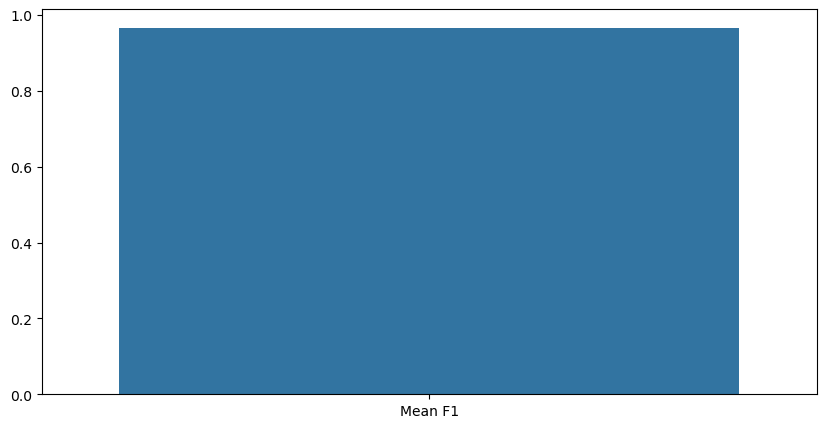

In [208]:
plt.figure(figsize=(10, 5))
for metric in scoring_metrics:
    sns.barplot(x=[f'Mean {metric.capitalize()}'], y=[cv_results[f'test_{metric}'].mean()], label=metric)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


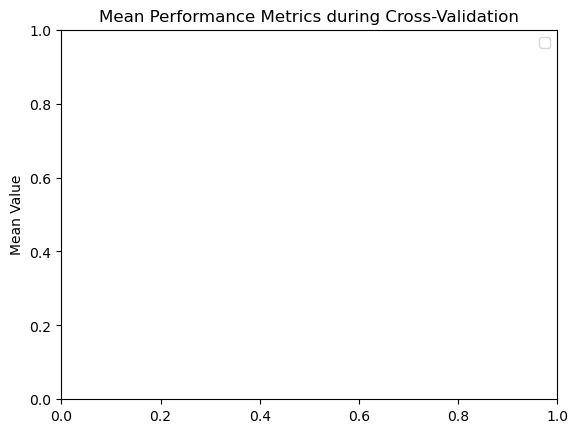

In [209]:
plt.title('Mean Performance Metrics during Cross-Validation')
plt.ylabel('Mean Value')
plt.legend()
plt.show()


In [210]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [211]:
predictions = model.predict(X_test)

In [212]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

In [213]:
print(f"\nMetrics on Test Set:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Metrics on Test Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
